In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("D:/WMT.csv")
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [15]:
df['Moving_Avg_5'] = df['Close'].rolling(window=5).mean()
df['Moving_Avg_10'] = df['Close'].rolling(window=10).mean()
df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)
df = df.dropna()

In [17]:
X = df[['Open', 'High', 'Low', 'Volume', 'Moving_Avg_5', 'Moving_Avg_10', 'Lag_1', 'Lag_2']]
y = df['Close'].shift(-1).dropna() 

In [19]:
X = X[:-1]
y = y
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
train_size = int(len(df) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [27]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [29]:
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 2488.9007


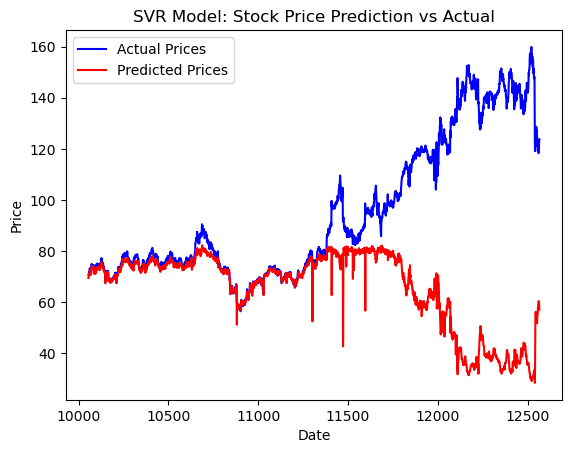

In [31]:
plt.plot(df.index[-len(y_test):], y_test, color='blue', label='Actual Prices')
plt.plot(df.index[-len(y_test):], y_pred, color='red', label='Predicted Prices')
plt.title('SVR Model: Stock Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
correlation = df[['Open', 'High', 'Low', 'Volume', 'Moving_Avg_5', 'Moving_Avg_10', 'Lag_1', 'Lag_2', 'Close']].corr()
print(correlation['Close'])

Open             0.999857
High             0.999930
Low              0.999920
Volume           0.316122
Moving_Avg_5     0.999771
Moving_Avg_10    0.999506
Lag_1            0.999796
Lag_2            0.999608
Close            1.000000
Name: Close, dtype: float64


In [35]:
'''
Analysis:
- The Moving_Avg_10 feature shows a strong positive correlation with the Close price, suggesting that past 10-day trends are important for predicting future prices.
- The lagged features (Lag_1 and Lag_2) also have a positive correlation with the Close price, indicating that previous day's prices can be useful for predicting the next day's price.
- Volume and High/Low values have weaker correlations with the target, but might still contribute valuable information when combined with other features.
'''

"\nAnalysis:\n- The Moving_Avg_10 feature shows a strong positive correlation with the Close price, suggesting that past 10-day trends are important for predicting future prices.\n- The lagged features (Lag_1 and Lag_2) also have a positive correlation with the Close price, indicating that previous day's prices can be useful for predicting the next day's price.\n- Volume and High/Low values have weaker correlations with the target, but might still contribute valuable information when combined with other features.\n"